In [ ]:
# import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (10,6))
np.set_printoptions(precision =4, suppress=True)


In [2]:
# Import two datasets
colnames = ["LOAN_ID", "ORIG_CHN", "Seller.Name", "ORIG_RT", "ORIG_AMT", "ORIG_TRM", "ORIG_DTE","FRST_DTE", "OLTV", 
            "OCLTV", "NUM_BO", "DTI", "CSCORE_B", "FTHB_FLG", "PURPOSE", "PROP_TYP","NUM_UNIT", "OCC_STAT", 
            "STATE", "ZIP_3", "MI_PCT", "Product.Type", "CSCORE_C", "MI_TYPE", "RELOCATION_FLG"]
Data_A = pd.read_table('D:/1-Intern/Project_1/2018Q1/Acquisition_2018Q1.txt', 
                       sep = '|', header = None, names = colnames)
colnames_P = ["LOAN_ID", "Monthly.Rpt.Prd", "Servicer.Name", "LAST_RT", "LAST_UPB", "Loan.Age", "Months.To.Legal.Mat", 
              "Adj.Month.To.Mat", "Maturity.Date", "MSA", "Delq.Status", "MOD_FLAG", "Zero.Bal.Code", 
              "ZB_DTE", "LPI_DTE", "FCC_DTE","DISP_DT", "FCC_COST", "PP_COST", "AR_COST", "IE_COST", "TAX_COST", "NS_PROCS",
              "CE_PROCS", "RMW_PROCS", "O_PROCS", "NON_INT_UPB", "PRIN_FORG_UPB_FHFA", "REPCH_FLAG", "PRIN_FORG_UPB_OTH", "TRANSFER_FLG"]
Data_P = pd.read_table('D:/1-Intern/Project_1/2018Q1/Performance_2018Q1.txt', 
                       sep = '|', header = None, names = colnames_P,low_memory=False)

In [3]:
df = pd.merge(Data_A, Data_P, on = 'LOAN_ID')

In [21]:
df.to_csv('D:/1-Intern/Project_1/2018Q1_new.csv')

In [15]:
df.shape

(9332050, 61)

In [12]:
df.head

<bound method NDFrame.head of               LOAN_ID ORIG_CHN               Seller.Name  ORIG_RT  ORIG_AMT  \
0        100001040173        R        QUICKEN LOANS INC.     4.25    453000   
1        100001040173        R        QUICKEN LOANS INC.     4.25    453000   
2        100001040173        R        QUICKEN LOANS INC.     4.25    453000   
3        100001040173        R        QUICKEN LOANS INC.     4.25    453000   
4        100001040173        R        QUICKEN LOANS INC.     4.25    453000   
...               ...      ...                       ...      ...       ...   
9332045  999998783494        R  CALIBER HOME LOANS, INC.     4.25    358000   
9332046  999998783494        R  CALIBER HOME LOANS, INC.     4.25    358000   
9332047  999998783494        R  CALIBER HOME LOANS, INC.     4.25    358000   
9332048  999998783494        R  CALIBER HOME LOANS, INC.     4.25    358000   
9332049  999998783494        R  CALIBER HOME LOANS, INC.     4.25    358000   

         ORIG_TRM ORI

In [ ]:
df['UPB_From_Last_Month']=df['LAST_UPB'].groupby(df['LOAN_ID']).shift(1)
df['UPB_From_Last_Month']

In [ ]:
# Define a function to calculate origination monthly payment  
def Monthly_Payment_Calculation(x, y,z):
    return (x * (y / 1200)* ((1 + (y / 1200))**z)) / (((1+( y/1200))**z) -1)

df['Montly_Payment'] = round(Monthly_Payment_Calculation(df.loc[:, 'ORIG_AMT'], df.loc[:, 'ORIG_RT'], df.loc[:, 'ORIG_TRM']),2)
df['Montly_Payment']

In [7]:
#Calculate monthly interest should be paid
df['Monthly_Interest_Payment']= df['UPB_From_Last_Month'] * (df['LAST_RT']/1200)
df['Monthly_Interest_Payment']

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
              ...     
9332045    1238.746402
9332046    1236.889294
9332047    1235.025598
9332048    1233.155315
9332049    1231.278408
Name: Monthly_Interest_Payment, Length: 9332050, dtype: float64

In [8]:
#Calculate monthly principal should be paid
df['Scheduled_Monthly_Principal_Payment']= df['Montly_Payment']- df['Monthly_Interest_Payment']
df['Scheduled_Monthly_Principal_Payment']

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
              ...    
9332045    522.393598
9332046    524.250706
9332047    526.114402
9332048    527.984685
9332049    529.861592
Name: Scheduled_Monthly_Principal_Payment, Length: 9332050, dtype: float64

In [9]:
# Here is the part that how many principal of loan  has been deducted. 
df['Actual_Loan_Amount_Deducted'] = df['UPB_From_Last_Month']- df['LAST_UPB']
df['Actual_Loan_Amount_Deducted'] 

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
            ...  
9332045    524.36
9332046    526.22
9332047    528.08
9332048    529.95
9332049    531.83
Name: Actual_Loan_Amount_Deducted, Length: 9332050, dtype: float64

In [10]:
#creat a column to calculate the total loan payment made 
df['Actual_Monthly_Payment'] = df['Actual_Loan_Amount_Deducted']+ df['Monthly_Interest_Payment']
df['Actual_Monthly_Payment']

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
              ...     
9332045    1763.106402
9332046    1763.109294
9332047    1763.105598
9332048    1763.105315
9332049    1763.108408
Name: Actual_Monthly_Payment, Length: 9332050, dtype: float64

In [ ]:
Monthly_Tot = df[['Actual_Monthly_Payment','Montly_Payment','UPB_From_Last_Month', 'LAST_UPB', 'Scheduled_Monthly_Principal_Payment']].groupby(df['Monthly.Rpt.Prd']).sum()
   

In [94]:
Monthly_Tot = pd.DataFrame(Monthly_Tot)

In [95]:
Monthly_Tot 

,Actual_Monthly_Payment,Montly_Payment,UPB_From_Last_Month,LAST_UPB,Scheduled_Monthly_Principal_Payment
Monthly.Rpt.Prd,,,,,
2018-01-01,0.000000e+00,1.909413e+08,0.000000e+00,0.000000e+00,0.000000e+00
2018-02-01,0.000000e+00,3.621730e+08,0.000000e+00,5.617500e+07,0.000000e+00
2018-03-01,0.000000e+00,5.272379e+08,0.000000e+00,1.423800e+08,0.000000e+00
2018-04-01,0.000000e+00,5.264848e+08,0.000000e+00,2.208610e+08,0.000000e+00
2018-05-01,0.000000e+00,5.253024e+08,0.000000e+00,3.329290e+08,0.000000e+00
2018-06-01,0.000000e+00,5.235277e+08,0.000000e+00,3.944530e+08,0.000000e+00
2018-07-01,0.000000e+00,5.214104e+08,0.000000e+00,3.536949e+10,0.000000e+00
2018-08-01,2.173280e+08,5.188807e+08,3.489604e+10,6.630193e+10,6.643347e+07
2018-09-01,3.812852e+08,5.159738e+08,6.577163e+10,9.521263e+10,1.251131e+08


In [67]:
def SMM(u,v,x,y):
    return(u - v)/(x - y)

Monthly_Tot['SMM'] = round( SMM(Monthly_Tot.loc[:, 'Actual_Monthly_Payment'], Monthly_Tot.loc[:, 'Montly_Payment'],
                                Monthly_Tot.loc[:, 'UPB_From_Last_Month'], Monthly_Tot.loc[:, 'Scheduled_Monthly_Principal_Payment']),6)

In [70]:
#calculate CPR 
def CPR(x):
    return(1-(1-x)**12)

Monthly_Tot['CPR']= round(CPR(Monthly_Tot.loc[:, 'SMM']), 6) 

In [79]:
Monthly_Tot = pd.DataFrame(Monthly_Tot)

In [86]:
Monthly_Tot

,Actual_Monthly_Payment,Montly_Payment,UPB_From_Last_Month,Scheduled_Monthly_Principal_Payment,SMM,CPR
Monthly.Rpt.Prd,,,,,,
2018-01-01,0.000000e+00,1.909413e+08,0.000000e+00,0.000000e+00,-inf,-inf
2018-02-01,0.000000e+00,3.621730e+08,0.000000e+00,0.000000e+00,-inf,-inf
2018-03-01,0.000000e+00,5.272379e+08,0.000000e+00,0.000000e+00,-inf,-inf
2018-04-01,0.000000e+00,5.264848e+08,0.000000e+00,0.000000e+00,-inf,-inf
2018-05-01,0.000000e+00,5.253024e+08,0.000000e+00,0.000000e+00,-inf,-inf
2018-06-01,0.000000e+00,5.235277e+08,0.000000e+00,0.000000e+00,-inf,-inf
2018-07-01,0.000000e+00,5.214104e+08,0.000000e+00,0.000000e+00,-inf,-inf
2018-08-01,2.173280e+08,5.188807e+08,3.489604e+10,6.643347e+07,-0.008658,-0.108989
2018-09-01,3.812852e+08,5.159738e+08,6.577163e+10,1.251131e+08,-0.002052,-0.024904


In [ ]:
# grouby based on  Monthly.Rpt.Prd
 # Total_Number_Monthly_loan = df.groupby(df['Monthly.Rpt.Prd']) 

In [75]:
number_monthly_loan = df.groupby(df['Monthly.Rpt.Prd']).size()
number_monthly_loan

Monthly.Rpt.Prd
2018-01-01    154550
2018-02-01    294697
2018-03-01    425979
2018-04-01    425384
2018-05-01    424437
2018-06-01    423043
2018-07-01    421417
2018-08-01    419451
2018-09-01    417183
2018-10-01    415230
2018-11-01    412994
2018-12-01    411083
2019-01-01    409209
2019-02-01    407338
2019-03-01    405206
2019-04-01    402428
2019-05-01    399181
2019-06-01    395278
2019-07-01    391627
2019-08-01    386917
2019-09-01    381637
2019-10-01    375622
2019-11-01    368809
2019-12-01    363350
dtype: int64

In [115]:
Number_ZBCode = df.groupby([df['Monthly.Rpt.Prd'],df['Zero.Bal.Code']]).size()
Number_ZBCode = Number_ZBCode.unstack()

In [116]:
Number_ZBCode

Zero.Bal.Code,1.0,2.0,3.0,6.0,9.0,15.0,16.0
Monthly.Rpt.Prd,,,,,,,
2018-02-01,225.0,NaN,NaN,1.0,NaN,NaN,NaN
2018-03-01,593.0,NaN,NaN,2.0,NaN,NaN,NaN
2018-04-01,944.0,NaN,NaN,4.0,NaN,NaN,NaN
2018-05-01,1387.0,NaN,NaN,7.0,NaN,NaN,NaN
2018-06-01,1616.0,NaN,NaN,10.0,NaN,NaN,NaN
2018-07-01,1956.0,NaN,NaN,9.0,1.0,NaN,NaN
2018-08-01,2247.0,NaN,NaN,21.0,NaN,NaN,NaN
2018-09-01,1930.0,NaN,NaN,23.0,NaN,NaN,NaN
2018-10-01,2190.0,NaN,NaN,44.0,2.0,NaN,NaN


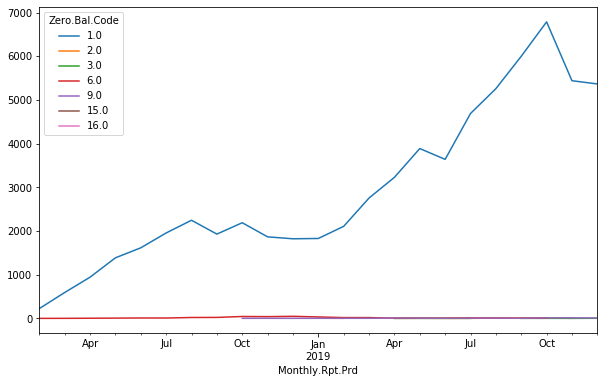

In [87]:
Number_ZBCode.plot()

In [90]:
Number_Delinquency_Status = df.groupby([df['Monthly.Rpt.Prd'],df['Delq.Status']]).size()
Number_Delinquency_Status.unstack()

Monthly.Rpt.Prd  Delq.Status
2018-01-01       0              154450
                 1                 100
2018-02-01       0              293478
                 1                 983
                 2                  10
                                 ...  
2019-12-01       6                 136
                 7                  89
                 8                  80
                 9                  44
                 X                5381
Length: 321, dtype: int64

In [91]:
Number_Delinquency_Status.unstack()

Delq.Status,0,1,10,11,12,13,14,15,16,17,...,21,22,3,4,5,6,7,8,9,X
Monthly.Rpt.Prd,,,,,,,,,,,,,,,,,,,,,
2018-01-01,154450.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,293478.0,983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.0
2018-03-01,424088.0,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,595.0
2018-04-01,422907.0,1381.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23.0,2.0,NaN,NaN,NaN,NaN,NaN,948.0
2018-05-01,421498.0,1318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,69.0,10.0,1.0,NaN,NaN,NaN,NaN,1394.0
2018-06-01,419646.0,1502.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,69.0,38.0,8.0,1.0,NaN,NaN,NaN,1626.0
2018-07-01,417628.0,1511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.0,44.0,19.0,6.0,1.0,NaN,NaN,1965.0
2018-08-01,415403.0,1411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,72.0,45.0,30.0,15.0,4.0,1.0,NaN,2268.0
2018-09-01,412488.0,2219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,105.0,45.0,37.0,25.0,12.0,5.0,NaN,1953.0


In [98]:
Loan_Nov = df[df['Monthly.Rpt.Prd'] == '2018-11-01']
Loan_Dec = df[df['Monthly.Rpt.Prd'] == '2018-12-01']

In [104]:
Loan_Dec_Prepay = Loan_Dec[Loan_Dec['Zero.Bal.Code'] == 1.0]

In [105]:
Loan_Dec_Prepay

,LOAN_ID,ORIG_CHN,Seller.Name,ORIG_RT,ORIG_AMT,ORIG_TRM,ORIG_DTE,FRST_DTE,OLTV,OCLTV,...,PRIN_FORG_UPB_OTH,TRANSFER_FLG,UPB_From_Last_Month,Montly_Payment,Interest_Payment_Per_Month,Scheduled_Monthly_Principal_Payment,Actual_Loan_Amount_Deducted,Monthly_Interest_Payment,Actual_Payment,Actual_Monthly_Payment
969,100078729993,R,OTHER,4.500,210000,360,01/2018,03/2018,50,50.0,...,NaN,NaN,204687.76,1064.04,767.579100,296.460900,0.0,767.579100,767.579100,767.579100
1376,100136687443,R,"LOANDEPOT.COM, LLC",4.875,101000,360,02/2018,04/2018,80,80.0,...,NaN,NaN,99652.07,534.50,404.836534,129.663466,0.0,404.836534,404.836534,404.836534
11401,101127088394,R,QUICKEN LOANS INC.,3.500,343000,180,12/2017,02/2018,80,80.0,...,NaN,NaN,327889.62,2452.05,956.344725,1495.705275,0.0,956.344725,956.344725,956.344725
14299,101408693953,R,OTHER,5.090,96000,360,01/2018,03/2018,65,65.0,...,NaN,NaN,95233.35,520.64,403.948126,116.691874,0.0,403.948126,403.948126,403.948126
17521,101717923585,C,"AMERIHOME MORTGAGE COMPANY, LLC",4.375,104000,180,02/2018,04/2018,70,70.0,...,NaN,NaN,99373.61,788.97,362.299620,426.670380,0.0,362.299620,362.299620,362.299620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9311593,998016407237,R,OTHER,5.250,113000,360,03/2018,05/2018,90,90.0,...,NaN,NaN,112388.18,623.99,491.698287,132.291713,0.0,491.698287,491.698287,491.698287
9320840,998893244464,B,OTHER,5.250,75000,360,12/2017,02/2018,75,75.0,...,NaN,NaN,74122.63,414.15,324.286506,89.863494,0.0,324.286506,324.286506,324.286506
9328681,999721104618,C,TRUIST BANK (FORMERLY SUNTRUST BANK),4.250,339000,360,12/2017,02/2018,80,80.0,...,NaN,NaN,334370.40,1667.68,1184.228500,483.451500,0.0,1184.228500,1184.228500,1184.228500
9328786,999725060397,C,FREEDOM MORTGAGE CORP.,3.375,91000,180,09/2017,11/2017,66,66.0,...,NaN,NaN,83266.59,644.97,234.187284,410.782716,0.0,234.187284,234.187284,234.187284


In [ ]:
df['Actual_Loan_Amount_Deducted'] = df['UPB_From_Last_Month']- df['LAST_UPB']
df['Actual_Loan_Amount_Deducted'] 

In [106]:
Loan_Dec_Prepay.head

<bound method NDFrame.head of               LOAN_ID ORIG_CHN                           Seller.Name  ORIG_RT  \
969      100078729993        R                                 OTHER    4.500   
1376     100136687443        R                    LOANDEPOT.COM, LLC    4.875   
11401    101127088394        R                    QUICKEN LOANS INC.    3.500   
14299    101408693953        R                                 OTHER    5.090   
17521    101717923585        C       AMERIHOME MORTGAGE COMPANY, LLC    4.375   
...               ...      ...                                   ...      ...   
9311593  998016407237        R                                 OTHER    5.250   
9320840  998893244464        B                                 OTHER    5.250   
9328681  999721104618        C  TRUIST BANK (FORMERLY SUNTRUST BANK)    4.250   
9328786  999725060397        C                FREEDOM MORTGAGE CORP.    3.375   
9331797  999983592797        R                                 OTHER    4.250  